# Decomposição

Tendência: São as mudanças graduais de **longo prazo** <br>
Sazonalidade: **Oscilações** que acontecem em **períodos específicos**<br>
Cíclo: Oscilações de curto prazo, ou seja, dentro de uma tendência. <br>
Resíduos: Zt - (T + S)

A decomposição serve para visualiar todas as quatro partes da série.

## Concentração de CO2

Concentração de CO2 na atmosfera em ppm de março de 1958 a dezembro de 2001 - Observatório Mauna Loa, Havaí

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
import statsmodels.api as sm

In [25]:
# Importar o Dataset CO2
dados = sm.datasets.co2.load_pandas().data
dados.sort_index(inplace = True)
dados # É possível visualizar que os dados são colhidos semanalmente

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [26]:
serie = pd.Series(dados['co2'].values, index = dados.index) # Já temos os índices, portanto, basta apenas importar do prórpio
# dataframe

<AxesSubplot:>

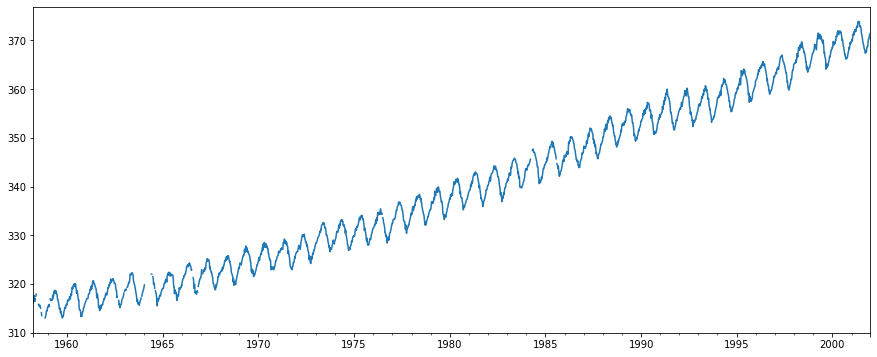

In [27]:
serie.plot()

É possível perceber algumas falhas nos dados, que possivelmente seja falta de valores, ou missing values.

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
decomposicao = seasonal_decompose(serie)

ValueError: This function does not handle missing values

A função nos retorna um erro pois há valores faltantes na nossa série. Vamos solucionar o problema.

In [30]:
# Analisar valores missing
(dados.isnull().sum()/dados.shape[0])*100

co2    2.583187
dtype: float64

Existem **59 valores ausentes** na nossa série de dados ou **2,58% dos dados faltando**.

Por ser uma parcela muito pequena, vamos apenas excluí-los.

In [31]:
dados.dropna(inplace=True)

In [32]:
serie = pd.Series(dados['co2'].values, index = dados.index)

<AxesSubplot:>

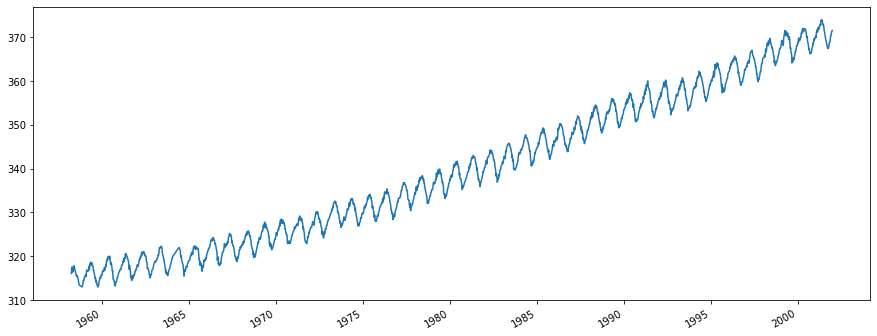

In [33]:
serie.plot()

In [51]:
decomposicao = seasonal_decompose(serie, period = 7) # A frequência, se já colocada como anual, diária e etc, não é preciso por, mas, neste caso, não foi posto.
# É importante que seja posto uma frequência

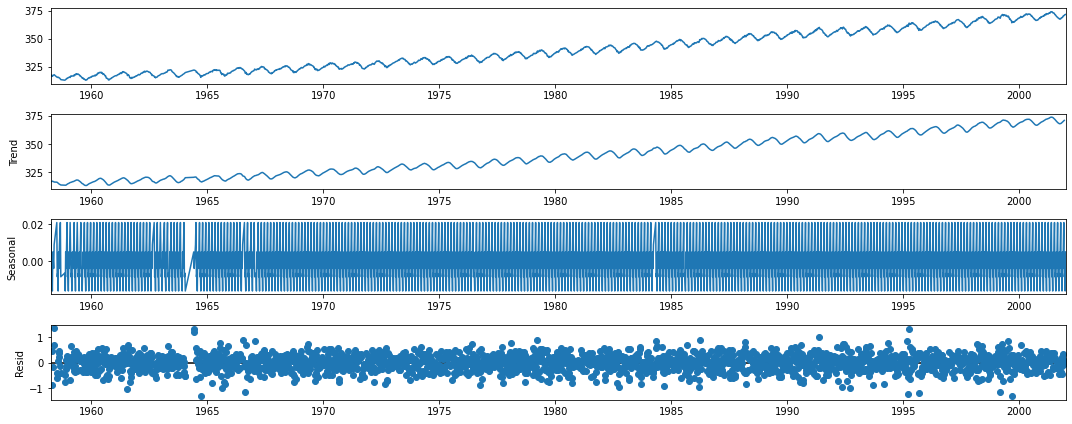

In [52]:
decomposicao.plot()
plt.show()

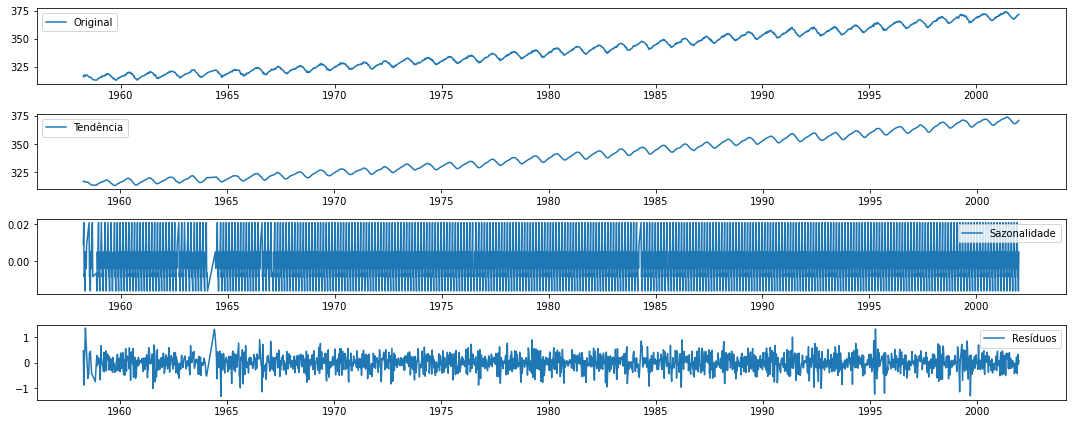

In [55]:
plt.subplot(411)
plt.plot(serie, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposicao.trend, label='Tendência')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposicao.seasonal,label='Sazonalidade')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposicao.resid, label='Resíduos')
plt.legend(loc='best')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [56]:
decom_mult = seasonal_decompose(serie, period = 7, model='multiplicative')

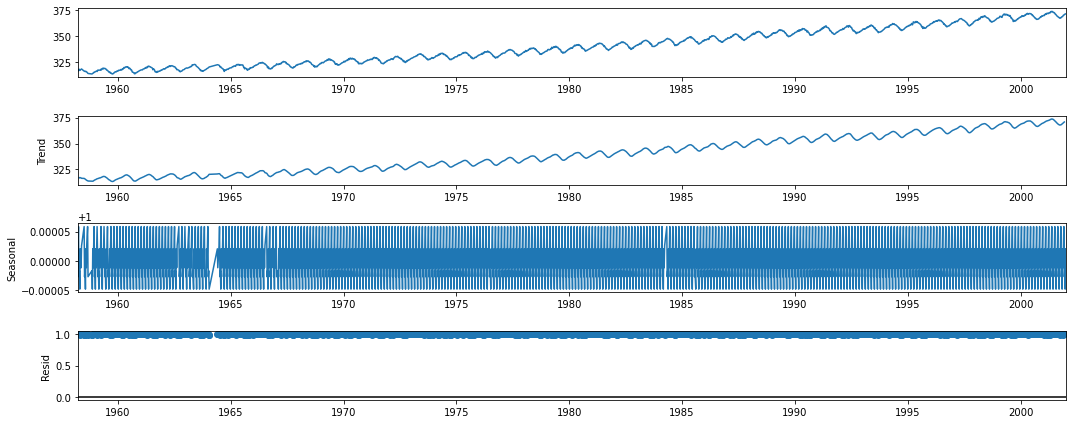

In [58]:
decom_mult.plot()
plt.show()

## Decomposição Manchas Solares 1

Número médio mensal de manchas solares relativas de 1749 a 1983. Coletados no Observatório Federal Suíço, Surique até 1960, e depois no Observatório Astronômico de Tóquio.

In [63]:
manchas_solares = pd.read_csv('sunspots.csv')
manchas_solares

,x
1,58.0
2,62.6
3,70.0
4,55.7
5,85.0
...,...
2816,71.8
2817,50.3
2818,55.8
2819,33.3


In [66]:
manchas_solares.columns = ['valores']
manchas_solares = manchas_solares.reset_index(drop = True) # Para tirar o índice que começa com 1
manchas_solares

,valores
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0
...,...
2815,71.8
2816,50.3
2817,55.8
2818,33.3


In [68]:
indice = pd.date_range('1749', periods = len(manchas_solares), freq = 'M') # Frequência mensal.
indice

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '1983-03-31', '1983-04-30', '1983-05-31', '1983-06-30',
               '1983-07-31', '1983-08-31', '1983-09-30', '1983-10-31',
               '1983-11-30', '1983-12-31'],
              dtype='datetime64[ns]', length=2820, freq='M')

In [70]:
serie2 = pd.Series(manchas_solares['valores'].values , index = indice)
serie2

1749-01-31    58.0
1749-02-28    62.6
1749-03-31    70.0
1749-04-30    55.7
1749-05-31    85.0
              ... 
1983-08-31    71.8
1983-09-30    50.3
1983-10-31    55.8
1983-11-30    33.3
1983-12-31    33.4
Freq: M, Length: 2820, dtype: float64

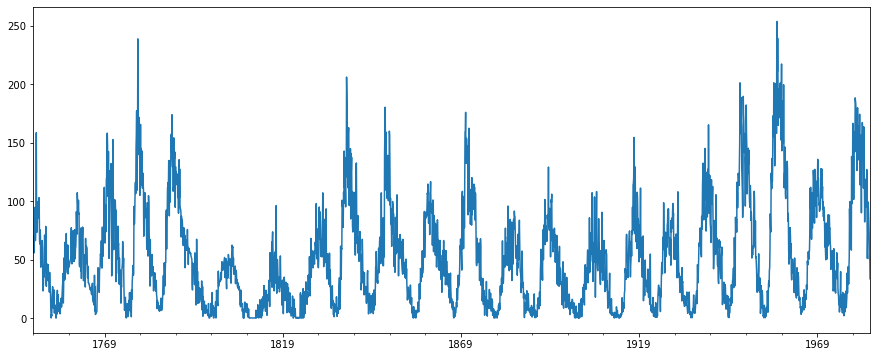

In [71]:
serie2.plot()
plt.show()

In [86]:
decomposicao2 = seasonal_decompose(serie2, period=120)

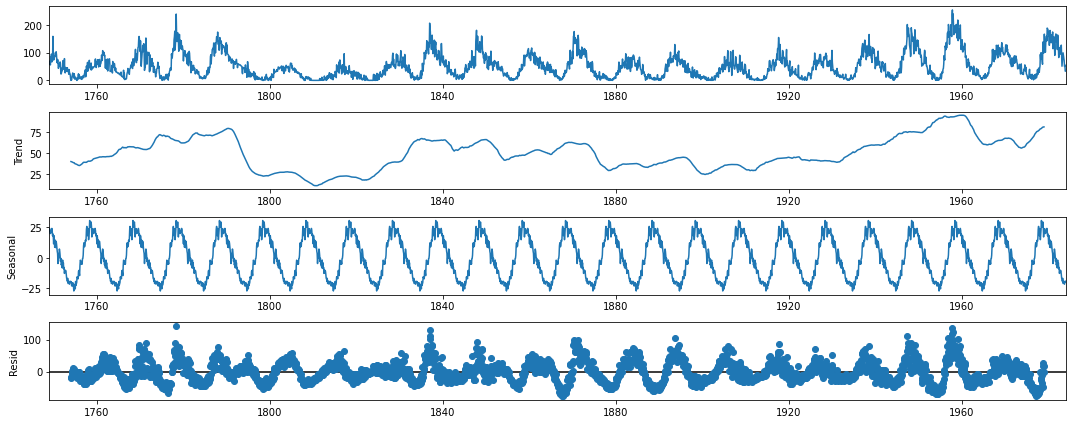

In [87]:
decomposicao2.plot()
plt.show()

Uma oscilação da sazonalidade indica uma ciclicidade ao redor de uma tendência. <br>

Não é possível realizar um modelo multiplicativo de decomposição, pois há valores zeros e negativos.

## Decomposição Manchas Solares 2

In [88]:
import statsmodels.api as sm

In [89]:
# Importação do Dataset Manchas Solares do Python
manchas_solares = sm.datasets.sunspots.load_pandas().data
manchas_solares

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [91]:
indice = pd.date_range('1700', periods = len(manchas_solares), freq = 'Y')
serie3 = pd.Series(manchas_solares['SUNACTIVITY'].values, index = indice)

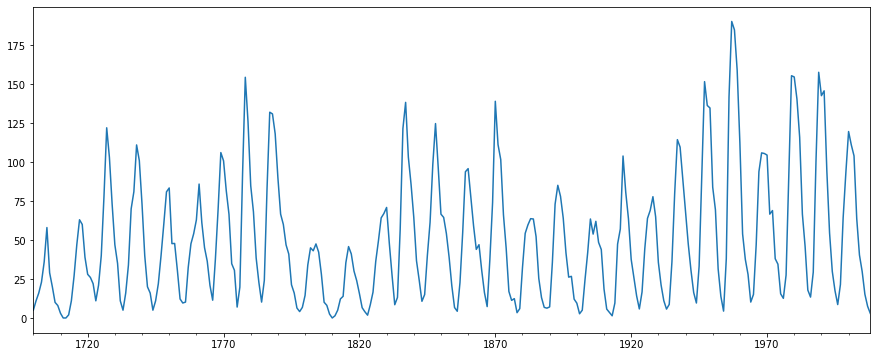

In [92]:
serie3.plot()
plt.show()

In [99]:
decomposicao3 = seasonal_decompose(serie3, period = 2)

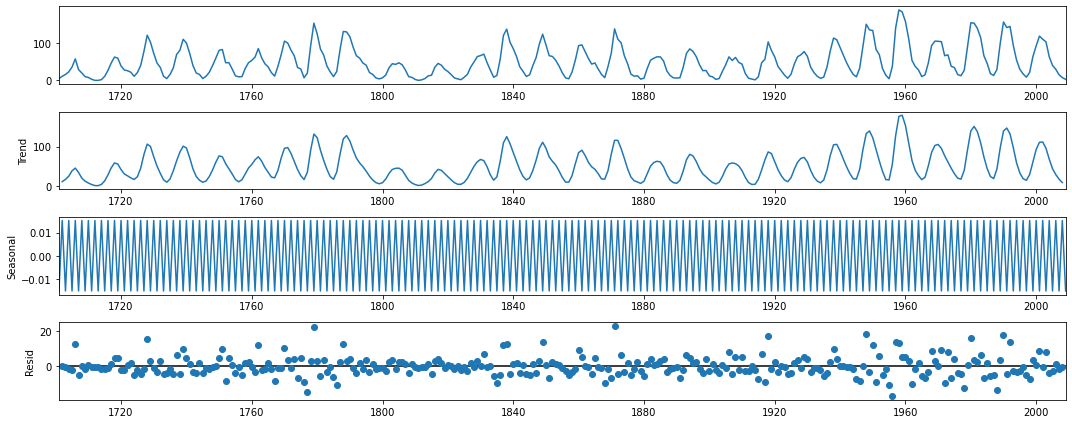

In [100]:
decomposicao3.plot()
plt.show()

Uma sazonalidade bastante forte, provando que há repetição de valores em tempos determinados. Uma tendência que reflete uma ciclicidade.